# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-12-06 20:00:03.812192


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/5/20


,12/5/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,14581337,281186,1.93
Brazil,6577177,176628,2.69
India,9644222,140182,1.45
Mexico,1168395,109456,9.37
United Kingdom,1710379,61111,3.57
Italy,1709991,59514,3.48
France,2334626,55073,2.36


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 12/5/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
55822,US,14139577,2020-12-03,276325.0,2879.0,217664.0,179467.142857
55821,US,13921913,2020-12-02,273446.0,2804.0,200055.0,164180.000000
55820,US,13721858,2020-12-01,270642.0,2597.0,180637.0,161498.857143
55819,US,13541221,2020-11-30,268045.0,1172.0,157851.0,160406.142857
55818,US,13383370,2020-11-29,266873.0,826.0,138669.0,162358.142857
55817,US,13244701,2020-11-28,266047.0,1189.0,155880.0,162949.285714
55816,US,13088821,2020-11-27,264858.0,1402.0,205514.0,166123.142857


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/5/20


,12/5/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,696125,34900.0,5.01
Texas,1311643,23055.0,1.76
California,1337941,19870.0,1.49
Florida,1049638,19084.0,1.82
New Jersey,361986,17306.0,4.78
Illinois,779975,14016.0,1.80
Pennsylvania,415635,11191.0,2.69


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 12/5/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1911,California,1286550,2020-12-03,19553.0,143.0,21368.0,16392.571429
1910,California,1265182,2020-12-02,19410.0,106.0,19140.0,14891.714286
1909,California,1246042,2020-12-01,19304.0,131.0,15778.0,14404.714286
1908,California,1230264,2020-11-30,19173.0,22.0,14809.0,14577.857143
1907,California,1215455,2020-11-29,19151.0,35.0,14831.0,14418.714286
1906,California,1200624,2020-11-28,19116.0,27.0,15048.0,13598.428571
1905,California,1185576,2020-11-27,19089.0,64.0,13774.0,13689.428571


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 12/5/20


,12/5/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,439408,7886.0,1.79
Orange,84853,1618.0,1.91
Riverside,95255,1472.0,1.55
San Bernardino,103911,1175.0,1.13
San Diego,90468,1055.0,1.17
Sacramento,41096,614.0,1.49
Alameda,31871,522.0,1.64


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 12/5/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
6058,Los Angeles,421881,2020-12-03,7782.0,42.0,7696.0,5515.142857
6057,Los Angeles,414185,2020-12-02,7740.0,40.0,5789.0,5123.142857
6056,Los Angeles,408396,2020-12-01,7700.0,45.0,7477.0,4894.571429
6055,Los Angeles,400919,2020-11-30,7655.0,16.0,5076.0,4326.142857
6054,Los Angeles,395843,2020-11-29,7639.0,16.0,4952.0,4474.714286
6053,Los Angeles,390891,2020-11-28,7623.0,19.0,3098.0,4146.000000
6052,Los Angeles,387793,2020-11-27,7604.0,24.0,4518.0,4334.571429
6051,Los Angeles,383275,2020-11-26,7580.0,37.0,4952.0,4291.857143
6050,Los Angeles,378323,2020-11-25,7543.0,46.0,4189.0,4283.857143
6049,Los Angeles,374134,2020-11-24,7497.0,51.0,3498.0,4230.142857



7 day new US cases as of 12/5/20


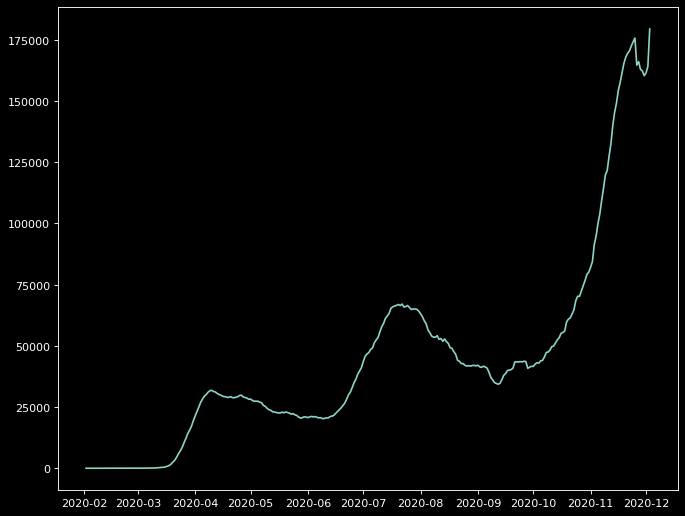

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 12/5/20


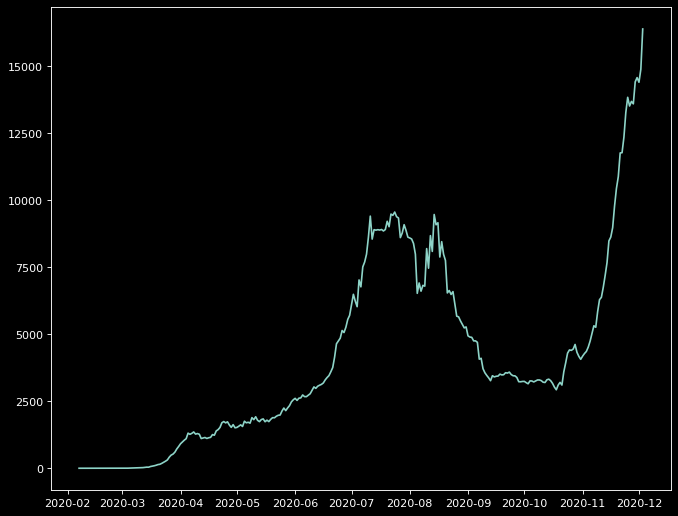

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 12/5/20


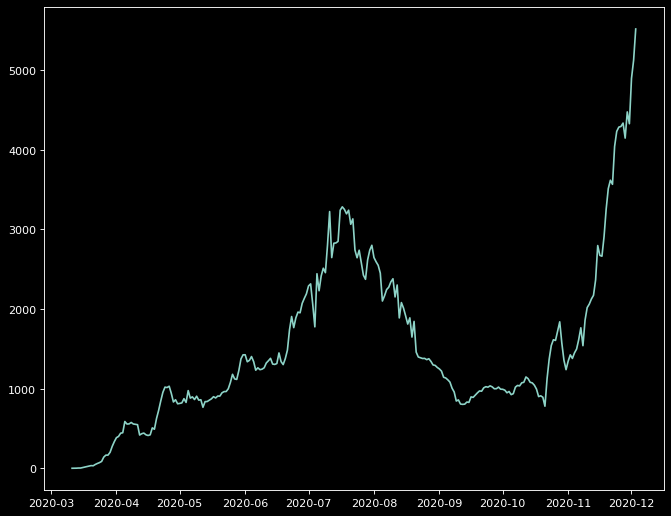

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()